# Jupyter code

## Importing Libraries

In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP for text pre-processing
import nltk
import scipy
import re
from scipy import spatial
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
tokenizer = ToktokTokenizer()

# other libraries
import gensim
from gensim.models import Word2Vec
import itertools
from sklearn.decomposition import PCA
from sklearn.feature_extraction. text import TfidfVectorizer
from sklearn.decomposition import PCA

# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# remove warnings
import warnings
warnings.filterwarnings (action = 'ignore')

In [ ]:
data = pd.read_csv("/content/flipkart_com-ecommerce_sample.csv") # Changed the file path
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


## Data Exploration - jupyter file

## Data Preprocessing

In [ ]:
data.isnull().sum()

,0
uniq_id,2
crawl_timestamp,2
product_url,2
product_name,2
product_category_tree,2
pid,2
retail_price,80
discounted_price,80
image,5
is_FK_Advantage_product,2


In [ ]:
#handling missing values
missing = pd.DataFrame(data.isnull().sum()).rename (columns = {0: 'missing' })
missing['percent'] = (missing['missing'] /len(data))*100
missing.sort_values ('percent', ascending = False)

,missing,percent
brand,5866,29.327067
retail_price,80,0.399960
discounted_price,80,0.399960
product_specifications,16,0.079992
image,5,0.024998
description,4,0.019998
uniq_id,2,0.009999
crawl_timestamp,2,0.009999
product_url,2,0.009999
product_name,2,0.009999


In [ ]:
# fing ing the redundant or duplicate rows and removingthem

duplicate_rows = data[data.duplicated()]

# Print the number of duplicate rows found
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display the duplicate rows (if any)
if duplicate_rows.shape[0] > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

# Remove duplicate rows and keep the first occurrence
data_cleaned = data.drop_duplicates()

# Verify the result by checking the new shape of the dataset
print(f"Original dataset shape: {data.shape}")
print(f"Dataset shape after removing duplicates: {data_cleaned.shape}")


Number of duplicate rows: 1
Duplicate rows found:
      uniq_id crawl_timestamp product_url product_name product_category_tree  \
20001     NaN             NaN         NaN          NaN                   NaN   

       pid  retail_price  discounted_price image is_FK_Advantage_product  \
20001  NaN           NaN               NaN   NaN                     NaN   

      description product_rating overall_rating brand product_specifications  
20001         NaN            NaN            NaN   NaN                    NaN  
Original dataset shape: (20002, 15)
Dataset shape after removing duplicates: (20001, 15)


### Text preprocessing

There is a lot of unwanted information present in the text data. Let's clean it up. Text preprocessing tasks include

* Converting the text data to lowercase
* Removing/replacing the punctuations
* Removing/replacing the numbers
* Removing extra whitespaces
* Removing stop words
* Stemming and lemmatization

In [ ]:
#to lowercase
data['description'] = data['description'].str.lower()

#removing punctivations
data['description'] = data['description'].str.replace(r'[^\w\d\s]',' ')

#replacing whitespace between terms with a single space
data['description'] = data['description'].str.replace(r'\s+',' ')

#removing leading and trailing whitespace
data['description'] = data['description'].str.replace(r'^\s+|\s+?$','')

data['description'].head()

,description
0,key features of alisha solid women's cycling s...
1,fabhomedecor fabric double sofa bed (finish co...
2,key features of aw bellies sandals wedges heel...
3,key features of alisha solid women's cycling s...
4,specifications of sicons all purpose arnica do...


In [ ]:
import nltk
nltk.download('stopwords')

#Removing stop words
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re

pattern = r'\b(?:{})\b'.format('|'.join(stop))
data['description'] = data['description'].str.replace(pattern, '')

# Removing single characters
data['description'] = data['description'].str.replace(r'\s+', ' ')
data['description'] = data['description'].apply(lambda x: " ".join([word for word in str(x).split() if len(word) > 1]))

# Removing domain related stop words from description
specific_stop_words = ["rs", "flipkart", "buy", "com", "free", "day", "cash", "replacement", "guarantee", "genuine", "key", "feature", "delivery", "products", "product", "shipping", "online", "india", "shop"]
data['description'] = data['description'].apply(lambda x: " ".join(word for word in str(x).split() if word not in specific_stop_words))

data['description'].head()

,description
0,features of alisha solid women's cycling short...
1,fabhomedecor fabric double sofa bed (finish co...
2,features of aw bellies sandals wedges heel cas...
3,features of alisha solid women's cycling short...
4,specifications of sicons all purpose arnica do...


### Visualizing the most occured words in corpus

In [ ]:
import nltk

# Download the required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

[('women', 10547), ('color', 5631), ('specifications', 5145), ('men', 5027), ('casual', 4920), ('fabric', 4910), ('material', 4855), ('general', 4772), ('collection', 4615), ('set', 4439)]


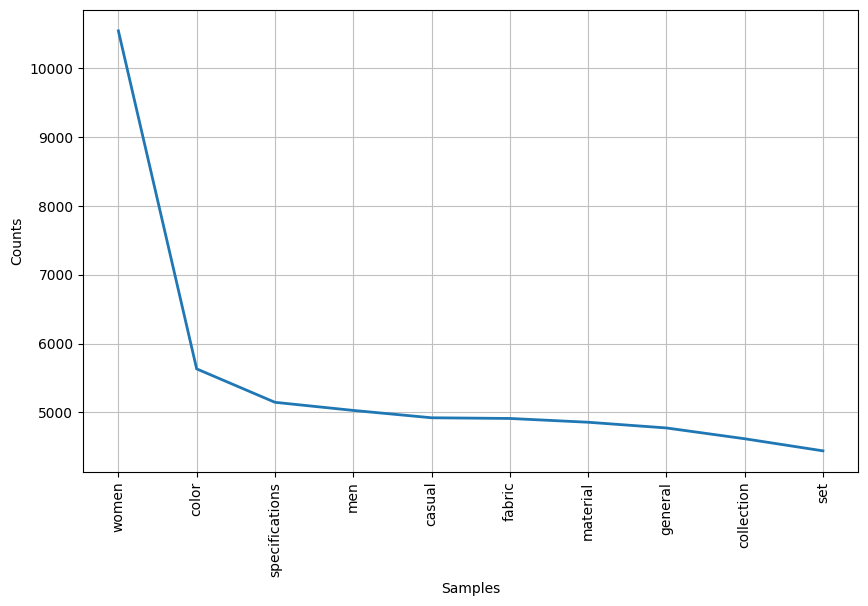

In [ ]:
#most frequent words after removing domain related stopwords

# Custom stopwords list (including 'rs' and other domain-specific terms)
custom_stopwords = stopwords.words('english') + ['rs', 'type','details','guarantee','product', 'products', 'delivery', 'shipping', 'cm','price', 'features']

# Concatenate all product descriptions into a single string
a = data['description'].str.cat(sep=' ')

# Tokenize the text
words = nltk.tokenize.word_tokenize(a)

# Filter out non-alphabetic words and stopwords (both generic and domain-specific)
words = [word for word in words if re.match(r'^[a-zA-Z]+$', word) and word.lower() not in custom_stopwords]

# Create a frequency distribution of the remaining words
word_dist = nltk.FreqDist(words)

# Plot the top 10 most frequent words
plt.figure(figsize=(10, 6))
word_dist.plot(10, cumulative=False)

# Print the top 10 most frequent words
print(word_dist.most_common(10))

In [ ]:
print(word_dist.most_common(15))

[('women', 10547), ('color', 5631), ('specifications', 5145), ('men', 5027), ('casual', 4920), ('fabric', 4910), ('material', 4855), ('general', 4772), ('collection', 4615), ('set', 4439), ('box', 4416), ('cotton', 4247), ('pack', 4126), ('solid', 3957), ('number', 3757)]


# Advanced Search Engine Using PyTerrier and Sentence-BERT

#Title of the Advanced Search Engine - "Hybrid Semantic Search Engine Using PyTerrier, SymSpell, and Sentence-BERT for Enhanced Product Retrieval"

#### installing required libraries and making setup

In [ ]:
# Install necessary packages
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
#developed by facebook ai reasearch lab, provides tools for building and training neural networks
#url is to download the CUDA version for GPU acceleration
!pip install -U sentence-transformers
#built on top of hugging face transofrmers
"""It simplifies the process of generating dense vector representations (embeddings) of sentences,
paragraphs, or documents. These embeddings can be used for tasks like semantic search, text similarity, clustering, and more.
used in models like BERT , RoBERTa, and DistilBERT. to work on NLP models"""

!pip install python-terrier
#It provides tools for indexing, querying, and evaluating retrieval systems
!pip install nltk
#Natural Language Toolkit (NLTK), ibraries for tokenization, stemming, lemmatization, part-of-speech tagging, parsing, and more.
!pip install scikit-learn
#simple and efficient tool for data mining and data analysis, built on NumPy, SciPy, and matplotlib
!pip install symspellpy
#an efficient spelling correction algorithm.

# Import libraries
import pandas as pd# data manipulation and analysis
import numpy as np #numerical computing in Python.
import string #contains a collection of string constants (e.g., punctuation characters, digits, letters).
import re #module provides support for regular expressions.
from nltk.corpus import stopwords #list of common words (e.g., "the", "and", "is") that are often removed from text because they don't contribute much to the meaning.
from nltk.tokenize import word_tokenize # splits text into individual words or tokens.
from nltk.stem.wordnet import WordNetLemmatizer #reduces words to their base or dictionary form (lemma).
import nltk
nltk.download('punkt')# for tokenization
nltk.download('wordnet') #for lemmatization
nltk.download('stopwords') #for stopword removal

Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 104.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 6

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install --upgrade python-terrier
# Initialize PyTerrier -  for information retrieval (IR) tasks.
import pyterrier as pt
# Check if PyTerrier is already initialized. If not, initialize it
if not pt.started():  # Replace pt.started() with pt.init()
    pt.init()  # This line initializes PyTerrier

# Uninstall the current torchvision
!pip uninstall -y torchvision

# Reinstall torchvision specifying the CUDA version
!pip install torchvision --index-url https://download.pytorch.org/whl/cu118

# Import SentenceTransformer for embeddings
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

# Import SymSpell for spelling correction
from symspellpy import SymSpell, Verbosity

terrier-assemblies 5.11 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.8 jar not found, downloading to /root/.pyterrier...
Done


Java started and loaded: pyterrier.java, pyterrier.terrier.java [version=5.11 (build: craig.macdonald 2025-01-13 21:29), helper_version=0.0.8]
<ipython-input-14-650a4381fc15>:6: DeprecationWarning: Call to deprecated method pt.init(). Deprecated since version 0.11.0.
java is now started automatically with default settings. To force initialisation early, run:
pt.java.init() # optional, forces java initialisation
  pt.init()  # This line initializes PyTerrier


Found existing installation: torchvision 0.20.1+cu124
Uninstalling torchvision-0.20.1+cu124:
  Successfully uninstalled torchvision-0.20.1+cu124
Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.6.0%2Bcu118-cp311-cp311-linux_x86_64.whl.metadata (27 kB)
  Using cached https://download.pytorch.org/whl/triton-3.2.0-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 848.7/848.7 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.7/166.7 MB 6.9 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.1.0
    Uninstalling triton-3.1.0:
      Successfully uninstalled triton-3.1.0
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu118
    Uninstalling torch-2.5.1+cu118:
      Successfully uninstalled 

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#### Data preprocessing

In [ ]:
# Load the dataset
df = pd.read_csv("/content/flipkart_com-ecommerce_sample.csv")

# Clean product category tree
df['product_category_tree'] = df['product_category_tree'].str.replace('>>', ',')
df['product_category_tree'] = df['product_category_tree'].str.replace('"', '')

# Drop unnecessary columns
df.drop(['product_url', 'image', "retail_price", "discounted_price",
         "is_FK_Advantage_product", "product_rating", "overall_rating", "product_specifications"],
        axis=1, inplace=True)

# Remove duplicate products
uniq_prod = df.copy()
uniq_prod.drop_duplicates(subset="product_name", keep="first", inplace=True)

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
exclude = set(string.punctuation)
lem = WordNetLemmatizer()

# Function to clean text
def filter_keywords(doc):
    doc = doc.lower()
    stop_free = " ".join([i for i in doc.split() if i not in stop_words])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    word_tokens = word_tokenize(punc_free)  # Tokenize the text
    filtered_sentence = [(lem.lemmatize(w, "v")) for w in word_tokens]  # Lemmatize tokens
    return " ".join(filtered_sentence)

# Apply cleaning to relevant columns
# Convert the 'product_name' column to string before applying filter_keywords
uniq_prod['product'] = uniq_prod['product_name'].astype(str).apply(filter_keywords)
uniq_prod['brand'] = uniq_prod['brand'].astype(str).apply(filter_keywords)
uniq_prod['description'] = uniq_prod['description'].astype(str).apply(filter_keywords)

# Combine all keywords for each product
uniq_prod["keywords"] = (
    uniq_prod['product'] + " " +
    uniq_prod['brand'] + " " +
    uniq_prod['product_category_tree']
)

# Create a 'docno' column for recommendations
uniq_prod['docno'] = uniq_prod['product_name'].astype(str)

#### Spell Correction with SymSpell

In [ ]:
# Download dictionaries for SymSpell
!wget https://raw.githubusercontent.com/mammothb/symspellpy/master/symspellpy/frequency_dictionary_en_82_765.txt
!wget https://raw.githubusercontent.com/mammothb/symspellpy/master/symspellpy/frequency_bigramdictionary_en_243_342.txt


--2025-02-19 04:08:07--  https://raw.githubusercontent.com/mammothb/symspellpy/master/symspellpy/frequency_dictionary_en_82_765.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1332879 (1.3M) [text/plain]
Saving to: ‘frequency_dictionary_en_82_765.txt’

frequency_dictionar 100%[===================>]   1.27M  --.-KB/s    in 0.07s   

2025-02-19 04:08:07 (19.5 MB/s) - ‘frequency_dictionary_en_82_765.txt’ saved [1332879/1332879]

--2025-02-19 04:08:08--  https://raw.githubusercontent.com/mammothb/symspellpy/master/symspellpy/frequency_bigramdictionary_en_243_342.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.1

In [ ]:

# Initialize SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# Load the pre-built dictionary
dictionary_path = "frequency_dictionary_en_82_765.txt"
bigram_path = "frequency_bigramdictionary_en_243_342.txt"

if not sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1):
    print("Dictionary file not found!")
if not sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2):
    print("Bigram dictionary file not found!")

# Function to correct spelling
def correct_spelling(text):
    suggestions = sym_spell.lookup_compound(text, max_edit_distance=2)
    corrected_text = suggestions[0].term
    return corrected_text

# Apply spell correction to the keywords
uniq_prod["corrected_keywords"] = uniq_prod["keywords"].astype(str).apply(correct_spelling)

####  Indexing with PyTerrier

In [ ]:
# Create a DataFrame for indexing
index_data = uniq_prod[['docno', 'corrected_keywords']]
index_data.columns = ['docno', 'text']

# Index the data
indexer = pt.DFIndexer("./index", overwrite=True)# creates an instance of a document frequency (DF) indexer
index_ref = indexer.index(index_data['text'], index_data['docno']) # This line indexes the documents, a reference to the created index.

# Retrieve documents using BatchRetrieve
retriever = pt.BatchRetrieve(index_ref, wmodel="BM25")

#### Semantic Search with Sentence-BERT

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Function to compute semantic similarity
def compute_semantic_similarity(query, documents):
    query_embedding = model.encode([query])
    document_embeddings = model.encode(documents)
    similarities = cosine_similarity(query_embedding, document_embeddings).flatten()
    return similarities

#### Combined Search and Ranking

In [ ]:
# Function to take user input and display results
def search_products(query):
    # Step 1: Spell correction
    corrected_query = correct_spelling(query)
    print(f"Corrected Query: {corrected_query}")

    # Step 2: Retrieve documents using BM25
    results = retriever.search(corrected_query)
    results = results.merge(uniq_prod, on='docno', how='left')

    # Step 3: Compute semantic similarity
    similarities = compute_semantic_similarity(corrected_query, results['corrected_keywords'].tolist())
    results['similarity_score'] = similarities

    # Step 4: Rank results by combining BM25 and semantic similarity
    results['final_score'] = results['score'] + results['similarity_score']
    ranked_results = results.sort_values(by='final_score', ascending=False)

    # Display top results
    return ranked_results[['product_name', 'brand', 'description', 'final_score']].head(10)

# Take user input
user_query = input("Enter your search query: ")
search_results = search_products(user_query)
print("\nSearch Results:")
search_results

Enter your search query: bed
Corrected Query: bed

Search Results:


,product_name,brand,description,final_score
0,Bed & Bath Cotton Floral Double Bedsheet,bed bath,bed bath cotton floral double bedsheet 1 bedsh...,9.841986
1,Scalabedding Cotton Striped King sized Double ...,scalabedding,buy scalabedding cotton strip king size double...,9.571030
2,Scalabedding Cotton Solid King sized Double Be...,scalabedding,buy scalabedding cotton solid king size double...,9.548457
4,Ethnic Handicrafts Solid Wood Single Bed,ethnic handicrafts,key feature ethnic handicrafts solid wood sing...,9.049851
3,Ethnic Handicrafts Solid Wood Queen Bed,ethnic handicrafts,key feature ethnic handicrafts solid wood quee...,9.045868
5,TIGI BED HEAD COLOUR GODDESS OIL INFUSED CONDI...,tigi bed head,key feature tigi bed head colour goddess oil i...,8.842719
6,FabHomeDecor Fabric Double Sofa Bed,fabhomedecor,fabhomedecor fabric double sofa bed finish col...,8.813873
7,ARIHANT Multicolor Rod Rail Bracket,arihant,key feature arihant multicolor rod rail bracke...,8.136936
8,The Intellect Bazaar Cotton Cartoon Single Bed...,intellect bazaar,key feature intellect bazaar cotton cartoon si...,7.998119
10,Jerry's Jppb11563 L Pet Bed,jerrys,buy jerrys jppb11563 l pet bed rs1590 online j...,7.922426


************

# Final code including soft computng Implementation -Fuzzy logic

*************

In [1]:
# Install necessary packages
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install -U sentence-transformers
!pip install python-terrier
!pip install nltk
!pip install scikit-learn
!pip install symspellpy
!pip install fuzzywuzzy
!pip install python-Levenshtein
!pip install spacy

# Download spaCy model
!python -m spacy download en_core_web_md

Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 101.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 6

In [3]:
# Uninstall the current torchvision
!pip uninstall -y torchvision

# Reinstall torchvision specifying the CUDA version
!pip install torchvision --index-url https://download.pytorch.org/whl/cu118

Found existing installation: torchvision 0.20.1+cu124
Uninstalling torchvision-0.20.1+cu124:
  Successfully uninstalled torchvision-0.20.1+cu124
Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.6.0%2Bcu118-cp311-cp311-linux_x86_64.whl.metadata (27 kB)
  Using cached https://download.pytorch.org/whl/triton-3.2.0-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 848.7/848.7 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.7/166.7 MB 7.0 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.1.0
    Uninstalling triton-3.1.0:
      Successfully uninstalled triton-3.1.0
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu118
    Uninstalling torch-2.5.1+cu118:
      Successfully uninstalled 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize PyTerrier
import pyterrier as pt
if not pt.started():
    pt.init()

# Import SentenceTransformer for embeddings
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

# Import SymSpell for spelling correction
from symspellpy import SymSpell, Verbosity

# Import FuzzyWuzzy for fuzzy matching
from fuzzywuzzy import fuzz

# Import spaCy for query expansion
import spacy
nlp = spacy.load("en_core_web_md")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-1-71c9a854f1d1>:16: DeprecationWarning: Call to deprecated function (or staticmethod) started. (use pt.java.started() instead) -- Deprecated since version 0.11.0.
  if not pt.started():
Java started and loaded: pyterrier.java, pyterrier.terrier.java [version=5.11 (build: craig.macdonald 2025-01-13 21:29), helper_version=0.0.8]
<ipython-input-1-71c9a854f1d1>:17: DeprecationWarning: Call to deprecated method pt.init(). Deprecated since version 0.11.0.
java is now started automatically with default settings. To force initialisation early, run:
pt.java.init() # optional, forces java initialisation
  pt.init()
/usr/local/lib/python3.11/d

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [2]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
# Load the dataset

df = pd.read_csv("/content/flipkart_com-ecommerce_sample.csv")

# Clean product category tree
df['product_category_tree'] = df['product_category_tree'].str.replace('>>', ',')
df['product_category_tree'] = df['product_category_tree'].str.replace('"', '')

# Drop unnecessary columns
df.drop(['product_url', 'image', "retail_price", "discounted_price",
         "is_FK_Advantage_product", "product_rating", "overall_rating", "product_specifications"],
        axis=1, inplace=True)

# Remove duplicate products
uniq_prod = df.copy()
uniq_prod.drop_duplicates(subset="product_name", keep="first", inplace=True)

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
exclude = set(string.punctuation)
lem = WordNetLemmatizer()

# Function to clean text
def filter_keywords(doc):
    doc = doc.lower()
    stop_free = " ".join([i for i in doc.split() if i not in stop_words])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    word_tokens = word_tokenize(punc_free)  # Tokenize the text
    filtered_sentence = [(lem.lemmatize(w, "v")) for w in word_tokens]  # Lemmatize tokens
    return " ".join(filtered_sentence)

# Apply cleaning to relevant columns
uniq_prod['product'] = uniq_prod['product_name'].astype(str).apply(filter_keywords)
uniq_prod['brand'] = uniq_prod['brand'].astype("str").apply(filter_keywords)
uniq_prod['description'] = uniq_prod['description'].astype(str).apply(filter_keywords)

# Combine all keywords for each product
uniq_prod["keywords"] = (
    uniq_prod['product'] + " " +
    uniq_prod['brand'] + " " +
    uniq_prod['product_category_tree']
)

# Create a 'docno' column for recommendations
uniq_prod['docno'] = uniq_prod['product_name'].astype(str)

In [4]:
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
# Function to expand query with related words using spaCy
def expand_query(query, topn=5):
    expanded_words = []
    doc = nlp(query)

    for token in doc:
        # Prioritize nouns over adjectives and ensure the token has a valid vector
        if token.pos_ == "NOUN" and token.has_vector:
            try:
                # Find the most similar words to the current noun
                similar_words = [
                    word.text for word in nlp.vocab
                    if word.has_vector and nlp(token.text).similarity(nlp(word.text)) > 0.7
                ][:topn]
                expanded_words.extend(similar_words)
            except KeyError:
                continue

    # Remove duplicates and filter out irrelevant words
    expanded_words = list(set(expanded_words))
    return " ".join(expanded_words)

In [6]:
# # Download dictionaries for SymSpell
# !wget https://raw.githubusercontent.com/mammothb/symspellpy/master/symspellpy/frequency_dictionary_en_82_765.txt
# !wget https://raw.githubusercontent.com/mammothb/symspellpy/master/symspellpy/frequency_bigramdictionary_en_243_342.txt

In [7]:
# Initialize SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# Load the pre-built dictionary
dictionary_path = "frequency_dictionary_en_82_765.txt"
bigram_path = "frequency_bigramdictionary_en_243_342.txt"

if not sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1):
    print("Dictionary file not found!")
if not sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2):
    print("Bigram dictionary file not found!")

# Function to correct spelling
def correct_spelling(text):
    suggestions = sym_spell.lookup_compound(text, max_edit_distance=2)
    corrected_text = suggestions[0].term
    return corrected_text

# Apply spell correction to the keywords
uniq_prod["corrected_keywords"] = uniq_prod["keywords"].astype(str).apply(correct_spelling)

2025-02-22 18:13:54,484: E symspellpy.symspellpy] Dictionary file not found at frequency_dictionary_en_82_765.txt.
ERROR:symspellpy.symspellpy:Dictionary file not found at frequency_dictionary_en_82_765.txt.
2025-02-22 18:13:54,486: E symspellpy.symspellpy] Bigram dictionary file not found at frequency_bigramdictionary_en_243_342.txt.
ERROR:symspellpy.symspellpy:Bigram dictionary file not found at frequency_bigramdictionary_en_243_342.txt.


Dictionary file not found!
Bigram dictionary file not found!


In [8]:
# Create a DataFrame for indexing
index_data = uniq_prod[['docno', 'corrected_keywords']]
index_data.columns = ['docno', 'text']

# Index the data
indexer = pt.DFIndexer("./index", overwrite=True)
index_ref = indexer.index(index_data['text'], index_data['docno'])

# Retrieve documents using BatchRetrieve
retriever = pt.BatchRetrieve(index_ref, wmodel="BM25")

<ipython-input-8-87fb0da2da72>:6: DeprecationWarning: Call to deprecated class DFIndexer. (use pt.terrier.IterDictIndexer().index(dataframe.to_dict(orient='records')) instead) -- Deprecated since version 0.11.0.
  indexer = pt.DFIndexer("./index", overwrite=True)
<ipython-input-8-87fb0da2da72>:10: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  retriever = pt.BatchRetrieve(index_ref, wmodel="BM25")


In [9]:
# Function to compute fuzzy relevance score
def fuzzy_relevance(query, product_name, description, brand):
    name_similarity = fuzz.token_set_ratio(query, product_name)
    desc_similarity = fuzz.token_set_ratio(query, description)
    brand_similarity = fuzz.token_set_ratio(query, brand)
    partial_similarity = fuzz.partial_ratio(query, product_name + " " + description)
    return 0.3 * name_similarity + 0.3 * brand_similarity + 0.2 * desc_similarity + 0.2 * partial_similarity
    # return 0.5 * name_similarity + 0.3 * desc_similarity + 0.2 * partial_similarity


from nltk.corpus import wordnet

def infer_category(category):
    category_synsets = wordnet.synsets(category)
    hyponyms = set()

    for synset in category_synsets:
        for hyponym in synset.hyponyms():  # Get specific items under the category
            hyponyms.update(hyponym.lemma_names())

    return list(hyponyms)

# print(get_hyponyms("furniture"))  # Output: ['sofa', 'bed', 'chair', 'table', etc.]


# Filter results by inferred category
def filter_by_category(results, query):
    category = infer_category(query)
    if category:
        results = results[results['product_category_tree'].str.contains(category, case=False)]
    return results

In [13]:
# Function to handle search and display results
def search_products_with_embeddings(query):
    # Step 1: Spell correction
    corrected_query = correct_spelling(query)
    print(f"Corrected Query: {corrected_query}")

    # Step 2: Expand query with related words
    expanded_query = f"{query} {corrected_query} {expand_query(corrected_query)}"
    print(expanded_query)

    # Step 3: Retrieve documents using BM25
    results = retriever.search(expanded_query).merge(uniq_prod, on="docno", how="left")
    pre_semantic_results = results.copy()

    # Step 4: Filter by category
    results = filter_by_category(results, expanded_query)
    print(f"Results count after category filter: {len(results)}")

    # Step 5: Compute semantic similarity
    try:
        query_embedding = model.encode([expanded_query])
        document_embeddings = model.encode(results["corrected_keywords"].tolist())

        if not len(document_embeddings):
            print("No valid embeddings found for the retrieved documents.")
            return suggest_alternatives(query, pre_semantic_results)

        results["similarity_score"] = cosine_similarity(query_embedding, document_embeddings).flatten()
    except Exception as e:
        print(f"Error during semantic similarity computation: {e}")
        return suggest_alternatives(query, pre_semantic_results)

    # Step 6: Compute fuzzy relevance
    results["fuzzy_score"] = results.apply(
        lambda row: fuzzy_relevance(expanded_query, row["product_name"], row["description"], row["brand"]),
        axis=1,
    )

    # Step 7: Filter results based on semantic similarity threshold
    SEMANTIC_THRESHOLD = 0.6
    results = results[results["similarity_score"] >= SEMANTIC_THRESHOLD]

    # Step 8: Rank results by combining BM25, semantic similarity, and fuzzy scores
    results["final_score"] = (
        results["score"] * 0.5 + results["similarity_score"] * 0.3 + results["fuzzy_score"] * 0.2
    )
    ranked_results = results.sort_values(by="final_score", ascending=False)
    print(f"Final results count: {len(ranked_results)}")

    # Step 9: Expand query if results < 5
    if len(ranked_results) < 5:
        inferred_category = " ".join(infer_category(query))
        if inferred_category.strip():
            print("Expanding query further for better results...")
            additional_expansion = expand_query(inferred_category)

            if additional_expansion.strip():
                expanded_query += f" {additional_expansion}"
                results = retriever.search(expanded_query).merge(uniq_prod, on="docno", how="left")

                # Repeat Steps 4-8 for updated results
                results = filter_by_category(results, expanded_query)

                try:
                    query_embedding = model.encode([expanded_query])
                    document_embeddings = model.encode(results["corrected_keywords"].tolist())

                    if len(document_embeddings) > 0:
                        results["similarity_score"] = cosine_similarity(query_embedding, document_embeddings).flatten()
                except Exception as e:
                    print(f"Error during semantic similarity computation: {e}")
                    return suggest_alternatives(query, pre_semantic_results)

                results["fuzzy_score"] = results.apply(
                    lambda row: fuzzy_relevance(expanded_query, row["product_name"], row["description"], row["brand"]),
                    axis=1,
                )

                results = results[results["similarity_score"] >= SEMANTIC_THRESHOLD]

                results["final_score"] = (
                    results["score"] * 0.5 + results["similarity_score"] * 0.3 + results["fuzzy_score"] * 0.2
                )

                ranked_results = pd.concat([ranked_results, results.sort_values(by="final_score", ascending=False)])

            print(f"Results count after additional expansion: {len(ranked_results)}")

    # Step 10: Display results or suggest alternatives
    if len(ranked_results) > 5:
      return ranked_results[["product_name", "brand", "description", "final_score"]].head(20)
    elif ranked_results.empty:
        print("Product not available.")
        if results.empty:
            print("No products found after semantic filtering. Returning pre-semantic results.")
        return suggest_alternatives(query, pre_semantic_results)
    elif len(ranked_results) < 5:
        res = pd.concat(ranked_results, suggest_alternatives(query, pre_semantic_results))
        return res[["product_name", "brand", "description", "final_score"]].head(20)


# Suggest alternative products if no match is found
def suggest_alternatives(query, pre_semantic_results):
    suggestions = retriever.search(query).merge(uniq_prod, on="docno", how="left")
    # if suggestions.empty:
    if len(suggestions) < 10:
        final_results = pd.concat([suggestions, pre_semantic_results])
        if len(final_results) == 0:
            return "No Results Found"
        return final_results[["product_name", "brand", "description"]].head(30)

    return suggestions[["product_name", "brand", "description"]].head(30)

# def suggest_alternatives(query, pre_semantic_results):
#     suggestions = retriever.search(query).merge(uniq_prod, on="docno", how="left")
#     # if suggestions.empty:
#     if len(suggestions) < 10:
#         suggestions = suggestions if not suggestions.empty else pd.DataFrame(columns=pre_semantic_results.columns)
#         final_results = pd.concat([suggestions, pre_semantic_results])
#         return final_results[["product_name", "brand", "description"]].head(30)
#     else:
#         return suggestions[["product_name", "brand", "description"]].head(30) if not suggestions.empty else "No Results Found"


In [15]:
# Take user input
user_query = input("Enter your search query: ")
search_results = search_products_with_embeddings(user_query)
print("\nSearch Results:")
search_results

Enter your search query: mobile phone
Corrected Query: mobile phone
mobile phone mobile phone phone
Results count after category filter: 542
Final results count: 94

Search Results:


,product_name,brand,description,final_score
0,BnC Universal 3 in 1 Cell Phone Camera Lens M...,bnc,key feature bnc universal 3 1 cell phone camer...,22.986778
33,Amaze Mobile Car Phone Holder for Lenovo RocSt...,amaze mobile,buy amaze mobile car phone holder lenovo rocst...,22.620097
4,V & B GALLERY Universal 3 in 1 Clip Camera pro...,v b gallery,specifications v b gallery universal 3 1 clip ...,22.260945
32,Aeoss Bike Phone Support Mobile holder,aeoss,buy aeoss bike phone support mobile holder rs3...,20.147938
3,AdroitZ Premium Phone Socket Holder For HTC One S,adroitz,key feature adroitz premium phone socket holde...,18.682829
1,AdroitZ Premium Phone Socket Holder For HTC On...,adroitz,key feature adroitz premium phone socket holde...,18.675910
2,AdroitZ Premium Phone Socket Holder For Nexus S,adroitz,key feature adroitz premium phone socket holde...,18.674387
31,Generix Android Smart Phone OTG OTG Cable,generix,key feature generix android smart phone otg ot...,18.664815
8,AdroitZ Premium Phone Socket Holder For E-TEN ...,adroitz,key feature adroitz premium phone socket holde...,18.576913
13,AdroitZ Premium Phone Socket Holder For Palm Pre,adroitz,key feature adroitz premium phone socket holde...,18.495958


In [16]:
# Take user input
user_query = input("Enter your search query: ")
search_results = search_products_with_embeddings(user_query)
print("\nSearch Results:")
search_results

Enter your search query: phone
Corrected Query: phone
phone phone phone
Results count after category filter: 52
Final results count: 1
Expanding query further for better results...
Results count after additional expansion: 17

Search Results:


,product_name,brand,description,final_score
0,BnC Universal 3 in 1 Cell Phone Camera Lens M...,bnc,key feature bnc universal 3 1 cell phone camer...,20.299162
0,BnC Universal 3 in 1 Cell Phone Camera Lens M...,bnc,key feature bnc universal 3 1 cell phone camer...,11.994601
2,V & B GALLERY Universal 3 in 1 Clip Camera pro...,v b gallery,specifications v b gallery universal 3 1 clip ...,11.914653
6,AdroitZ Premium Phone Socket Holder For HTC One S,adroitz,key feature adroitz premium phone socket holde...,11.157076
4,AdroitZ Premium Phone Socket Holder For HTC On...,adroitz,key feature adroitz premium phone socket holde...,11.154919
11,AdroitZ Premium Phone Socket Holder For HTC Se...,adroitz,key feature adroitz premium phone socket holde...,11.147083
14,AdroitZ Premium Phone Socket Holder For Palm Pre,adroitz,key feature adroitz premium phone socket holde...,10.850587
10,AdroitZ Premium Phone Socket Holder For E-TEN ...,adroitz,key feature adroitz premium phone socket holde...,10.811110
16,AdroitZ Premium Phone Socket Holder For Motoro...,adroitz,key feature adroitz premium phone socket holde...,10.782204
19,AdroitZ Premium Phone Socket Holder For Nokia N9,adroitz,key feature adroitz premium phone socket holde...,10.731683
